## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

## Analysing Newyork high school data and SAT scores.


### Project participants:

* Praveen Gopal Reddy (mm20pgr@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

The data we are going to use in this project is published by the City of New York.This includes SAT scores, demographic information and other data that is useful for our data analysis project.

SAT is a Scholastic Aptitude Test that high school seniors in the US take every year. This test has three sections each of which has maximum of 800 points.A high SAT score usually means that school is good.Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2). Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Below are the links to all of the data sets we will be using:

- [`SAT scores by school`](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
- [`School attendance`](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each school in New York City
- [`Class size`](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
- [`AP test results`](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [`Graduation outcomes`](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated and other outcome information
- [`Demographics`](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
- [`School survey`](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.
we have downloaded all above data and placed all the data into the schools folder(saved into local machine). The the files in the folder are :

- `ap_2010.csv` - Data on AP test results
- `class_size.csv` - Data on class size
- `demographics.csv` - Data on demographics
- `graduation.csv` - Data on graduation outcomes
- `hs_directory.csv` - A directory of high schools
- `sat_results.csv` - Data on SAT scores
- `survey_all.txt` - Data on surveys from all schools
- `survey_d75.txt` - Data on surveys from New York City district 75

lets have a look at some important columns for  some files. 

- `sat_results` file 

| column name | description |
| --- | --- | 
| DBN | District, Borough and school number |
| SchoolName |School name |
|AP Test Takers | Number of students whom have taken AP test per school |

- `graduation` file 

| column name | description |
| --- | --- |
| Demographic | Student's demographic information  |
| DBN | District, Borough and school number |
|Total Grads - n | Reflects the total number of students whom graduated |
|Dropped Out - n| Total number of students who dropped out |

- `demographics` file 

| column name | description |
| --- | --- | 
| DBN | District, Borough and school number |
|Name | School name |
|Schoolyear| School Year |
|grade 1 ~ grade 12 |Total count of 1-12 grade students by DBN/School per school year|
|asian_num |Total number of asian students in school|
|black_num |Total number of black students in school|
|white_num|Total number of white students in school|
|male_num|Total number of male students in school|
|female_num|Total number of female students in school|
|

- `survey` file

| column name | description |
| --- | --- | 
| DBN | District, Borough and school number |
|saf_s_11|Safety and Respect score based on student responses|
|saf_p_11|Safety and Respect score based on parent responses|
|saf_t_11|Safety and Respect score based on teacher responses|

Note: All above files have common column that is DBN, we can use this column to merge files, query results from different files by joins and so on.


## Project Aim and Objectives (5 marks)

One of the most controversial issues in the U.S. educational system is the effectiveness of standardized tests, and whether they are unfair to certain groups or not. We will examine this in connection with the SAT.Investigating the correlations between SAT scores and demographics might give us an answer that the tests is unfair or not.

In order to achieve our objective we first need to read in all the data, and do necessary data cleaning. Since all datasets are interrelated, we will combine them into a single dataset and then find correlations. Our main steps are :

- cleaning the survey files ( select important columns)
- parse geographic coordinates of schools.
- condense `class_size`, `graduation`, `demographics` datasets due to duplicate records and other abnormal data.
- combine datasets into single dataset using left jons and inner joins and then fill missing values.
- discover correlations(using Pearson correlation coefficient) in demographics and visualize them with plots.

### Specific Objective(s)

* __Objective 1:__ combine all data sets into single coherent dataframe after cleaning,filtering and modifications on each file with the help of pandas,numpy and regular expressions.So, our final dataframe can be used for finding correlations between demographics and SAT score 

* __Objective 2:__ plotting correlations between race and SAT, gender and SAT, class size and SAT, AP exam and SAT with the help of matplotlib, seaborn and basemap.


## System Design (5 marks)

### Architecture

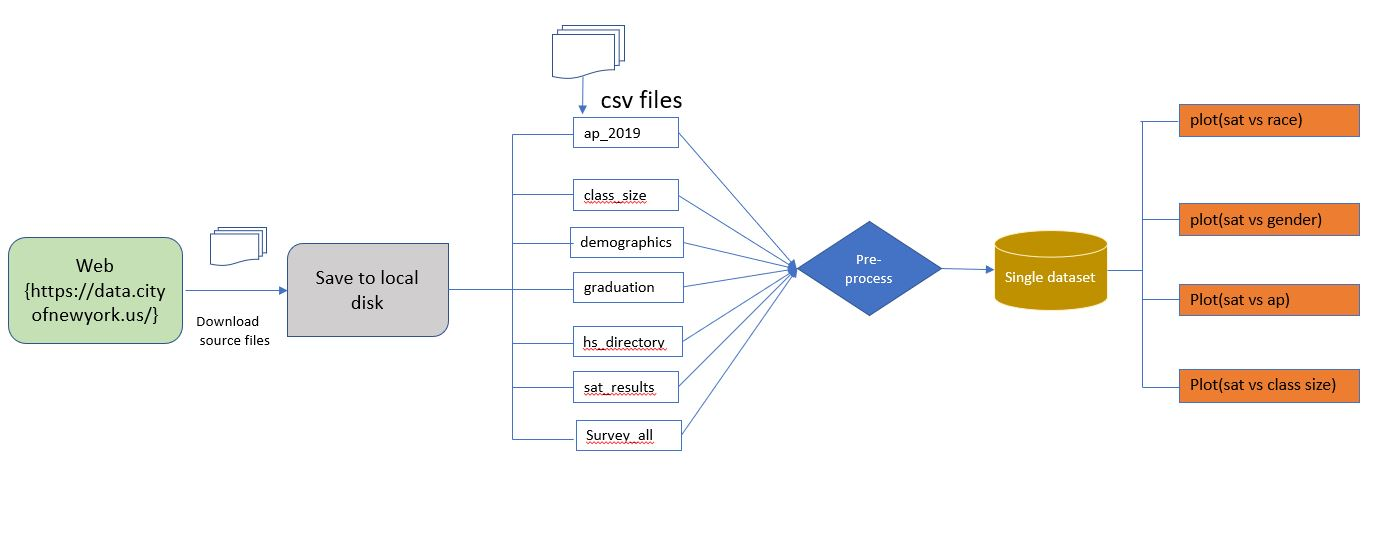

The above diagram shows simple data analysis flow.
- we first download files from website.
- store the files to local disk.
- read the files via read_csv and then perform pre-process operations on each file.
- once each file is filtered and cleaned we merge all individual files into one coherent single dataset.
- we then use this single file for finiding correlations, plotting, create maps and for peform other statistical analysis.

  
### Processing Modules and Algorithms

The implementation flow is as follows :

- read all csv files and store all dataframes in a dictionary
- remove unwanted columns and rename columns in `survey` and `hs_directory`
- pad_csd() function to pad csd column and create dbn column for `class_size` dataframe
- parse_latitude(string) and parse_longitude(string) functions will parse latitude and longitude columns to get required format
and then store into new column.
- convert columns to numeric and combine SAT writing, reading, math results into single column 
- used left and inner joins to merge 6 datasets into single dataset.
- prepare visualization code for objective 1 and 2

# Program Code (15 marks)

### read csv files and store datasets in a dictionary 

In [66]:
import pandas as pd
source_data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"]

data = {}
    
for f in source_data_files:
    d =  pd.read_csv("schools/{0}".format(f))
    key_name = f.replace('.csv', '')
    data[key_name] = d

Let's explore sat_results dataframe to see whether above function working or not. As you see below we can successfully print file records.

In [67]:
print(data['sat_results'].head(5))

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

From below cell we can see survey has more than 2000 columns. we will select only important columns. As per dictionary file
below are important fields that we need.
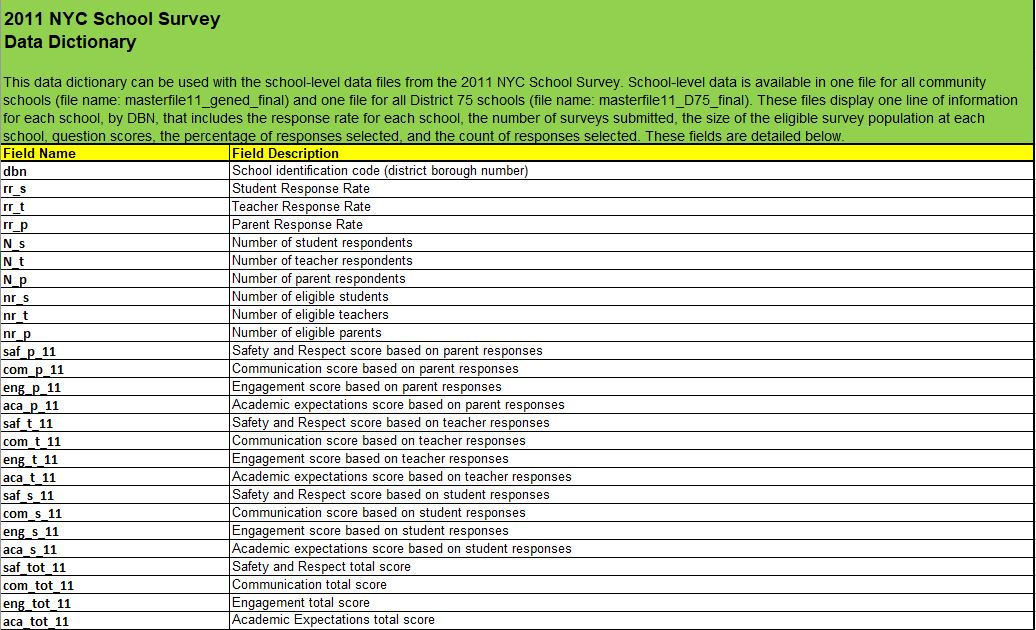

In [68]:
#read survey data and concatenate survey files 
all_survey = pd.read_csv('schools/survey_all.txt', encoding='windows-1252', delimiter="\t")
d75_survey = pd.read_csv('schools/survey_d75.txt', encoding='windows-1252', delimiter='\t')
survey = pd.concat([all_survey, d75_survey], axis=0, sort='True')
survey.head(5)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [69]:
# rename dbn column to be consistent with other datasets and select important columns and then add dataframe to data dictionary 
survey["DBN"] = survey["dbn"]
survey_fields = [ "DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11",  "aca_s_11", "saf_tot_11",  "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

 `class_size` dont have DBN column but we can get this from csd and school code columns.
- first pad the csd 
- merge csd+school code to get DBN.

In [70]:
#add DBN column to class size data frame.
def pad_csd(num):
    return str(num).zfill(2)
    
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)

data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

print(data['class_size'].head(2))

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  \
0                   19.0         ATS            

### Parsing Geographic Coordinates for Schools.
- The coordinates are currently in the text field Location 1 in the `hs_directory data` set.
- we want latitude and longitude in required format for later use.

example data: 
    1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)

In [71]:
import re

def parse_latitude(string):
    gps_lat_lon = re.findall("\(.+\)", string)
    gps_lat = gps_lat_lon[0].split(",")[0].replace('(',"")
    return gps_lat
    
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(parse_latitude)
print(data['hs_directory']['lat'].head())

0     40.67029890700047
1      40.8276026690005
2    40.842414068000494
3     40.71067947100045
4    40.718810094000446
Name: lat, dtype: object


In [72]:
import re

def parse_longitude(string):
    gps_lat_lon = re.findall("\(.+\)", string)
    gps_lon = gps_lat_lon[0].split(",")[1].replace(')',"").strip()
    return gps_lon

data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(parse_longitude)
data["hs_directory"]["lon"] = pd.to_numeric(data['hs_directory']['lon'],errors='coerce')
data["hs_directory"]["lat"] = pd.to_numeric(data['hs_directory']['lat'],errors='coerce')
print(data['hs_directory']['lon'].head())

0   -73.961648
1   -73.904475
2   -73.916162
3   -74.000807
4   -73.806500
Name: lon, dtype: float64


### convert columns to numeric and combine SAT results

In [73]:
columns = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score','Num of SAT Test Takers']
# convert columns to numeric and reassign
for c in columns:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# add results to new column
data['sat_results']['sat_score'] = data['sat_results'][columns[0]] + data['sat_results'][columns[1]] + data['sat_results'][columns[2]]

cols_ap = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
# Converting the values to numeric
for col in cols_ap:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

data['sat_results'].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0


### condensing datasets 

we are dealing with high schools, we are only concerned with grades 9 through 12.Each school can have multiple program types. 
Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

In [74]:
# Creating a new variable to store only the required values
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [75]:
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


We can see that there are still multiple values of DBN present in the dataframe. this is due to various core subjects.lets group them by DBN and take average.

In [76]:
import numpy
# group by DBN and take average
class_size = class_size.groupby("DBN").agg(numpy.mean)
# reset the index
class_size.reset_index(inplace=True)
data["class_size"] = class_size

- In demographics, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows 
where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data
- In graduation,we can see that the Demographic and Cohort columns are what prevent DBN from being unique in the 
graduation data. we want to pick data from the most recent Cohort available, which is 2006

In [77]:
#condense demograhics and graduation datasets
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]
data['graduation'] = data['graduation'][(data['graduation']['Cohort'] == '2006') & (data['graduation']['Demographic'] == 'Total Cohort')]

### Combine datasets and fill null values

In [78]:
# Merging datasets with more missing values

combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

# Merging datasets with less missing values

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

#add school_dist code
def get_first_two_chars(dbn):
    return dbn[:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

### visualization code on combined dataset (objective 1)

In [79]:
import matplotlib.pyplot as plt
def objective1_visual1():
    combined[['Num of SAT Test Takers','sat_score','male_num','female_num','total_students','asian_num','black_num','hispanic_num','white_num']].hist(figsize=(15,15), xrot=-45, bins=10)
    plt.show()

In [80]:
import seaborn as sns
def objective1_visual2():
    plt.figure(figsize=(10,10))
    chart=sns.countplot(x='boro',data=combined,order=pd.value_counts(combined['boro']).iloc[:15].index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=15)
    plt.title('No of schools by Borough',fontsize=20)

In [81]:
def objective1_visual3():
    fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15,12))
    # group by borough and do median calculation on asian_num,black_num,hispanic_num and white_num
    combined.groupby('boro').asian_num.median().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen','hotpink','darkcyan','olivedrab'], rot=0)
    ax1.set_title('Median Asian numbers by borough ',fontsize=15)

    combined.groupby('boro').black_num.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen','hotpink','darkcyan','olivedrab'], rot=0)
    ax2.set_title('Median black numbers by borough',fontsize=15)

    combined.groupby('boro').hispanic_num.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen','hotpink','darkcyan','olivedrab'], rot=0)
    ax3.set_title('Median hispanic numbers by borough',fontsize=15)

    combined.groupby('boro').white_num.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen','hotpink','darkcyan','olivedrab'], rot=0)
    ax4.set_title('Median white numbers by borough',fontsize=15)

    fig.subplots_adjust(hspace=0.3)
    plt.show()

### visualization code for  objective 2

#### safety score by districts on map

In [82]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/PG/anaconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
from mpl_toolkits.basemap import Basemap
def safety_score_by_borough():
    districts = combined.groupby("school_dist").agg(numpy.mean)
    districts.reset_index(inplace=True)

    plt.figure(figsize=(8,8))

    m = Basemap(
        projection='merc', 
        llcrnrlat=40.496044, 
        urcrnrlat=40.915256, 
        llcrnrlon=-74.255735, 
        urcrnrlon=-73.700272,
        resolution='h'
    )

    m.drawmapboundary(fill_color='#c1f2f8')
    m.drawcoastlines(color='#6D5F47', linewidth=0.5)
    m.drawrivers(color='#6D5F47', linewidth=0.5)
    m.fillcontinents(color='white')

    #latitude and longitude
    longitudes = districts['lon'].tolist()
    latitudes = districts['lat'].tolist()


    m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts['saf_s_11'], cmap='RdYlGn')
    plt.colorbar()
    plt.title("Safety and Respect score based on student responses")
    plt.xlabel("newyork map")
    plt.show()

#### a) correlation SAT and Race

In [83]:
def plot_sat_race_corr():
    race = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
    combined.corr()['sat_score'][race].sort_values().plot.bar(
        title=" Correlation between Race and SAT Score")
    plt.ylabel("correlation value")

#### b) correlation SAT and Gender

In [84]:
def plot_sat_gender_corr():
    combined.corr()['sat_score'][['male_per', 'female_per']].plot.bar()
    plt.title("Correlation between Gender and SAT Score")
    plt.ylabel("correlation value")

#### c) correlation SAT and AP exams

In [85]:
def plot_sat_ap_corr():
    combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']
    ax = combined.plot.scatter("ap_per", "sat_score", fontsize=20, zorder=5)
    ax.hlines(1200, 0, 1, color="salmon", alpha=4, linestyle="--")
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlabel("ap_per", fontsize=20)
    ax.set_ylabel("sat_score", fontsize=20)
    plt.gcf().set_size_inches(20, 10) 
    plt.title("Correlation between AP percentage and SAT Score")
    plt.show()

#### d) correlation SAT and class size 

In [86]:
def plot_sat_size_corr():
    combined.plot.scatter(x='AVERAGE CLASS SIZE', y='sat_score' , s=100, alpha=.5)
    plt.title("Correlation between class size and SAT scores")

#### e) survery response columns correlation vs SAT

In [105]:
def plot_sat_survey_response():
    
    # Creating new map for color-coding positive and negative values:
    negative_corr = combined.corr()["sat_score"][survey_fields] < 0
    positive_corr = combined.corr()["sat_score"][survey_fields] > 0.23

    fig = plt.figure(figsize=(15,6))

    # Plotting bar chart
    ax = combined.corr()["sat_score"][survey_fields].plot.barh(fontsize=15,
                                                               zorder=10, 
                                                               width=0.6,
                                                               color=negative_corr.map(
                                                                   {True: "firebrick", False: "aqua"}
                                                               )
                                                              ) 
    """
    Using list comprehensions we will extrapolate the index of negative and values.
    We will use this index to create horizontal lines, so it will be easy to see
    what `survey_fields` indexes are important.
    """
    neg = [i for i, x in enumerate(negative_corr) if x]
    ax.hlines(neg, -0.5, 0, colors='salmon', alpha=0.7, linestyle='dashdot', zorder=5)

    pos = [i for i, x in enumerate(positive_corr) if x]
    ax.hlines(pos, -0.5, 0, colors='aqua', alpha=0.3, linestyle='dashdot', zorder=5)

    ax.set_title("Survey Response: Correlation with SAT Scores", size=18)
    ax.set_xlim(-0.5, 0.5)
    ax.axvline(0.2, color="dimgray", alpha=0.5, linestyle="--")
    ax.axvline(0.4, color="dimgray", alpha=0.5, linestyle="--")
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)

    plt.show()

#### f) A brief about survery columns  

In [115]:
def survery_columns_description():
    legend_dict = {'sch_type' : 'School type (Elementary, Middle, High, etc)',
    'location' : 'School name',
    'enrollment' : 'Enrollment size',
    'borough' : 'Borough',
    'principal' : 'Principal name',
    'studentsurvey' : 'Only students in grades 6-12 partipate in the student survey.',
    'rr_s' : 'Student Response Rate',
    'rr_t' : 'Teacher Response Rate',
    'rr_p' : 'Parent Response Rate',
    'N_s' : 'Number of student respondents',
    'N_t' : 'Number of teacher respondents',
    'N_p' : 'Number of parent respondents',
    'nr_s' : 'Number of eligible students',
    'nr_t' : 'Number of eligible teachers',
    'nr_p' : 'Number of eligible parents',
    'saf_p_11' : 'Safety and Respect score based on parent responses',
    'com_p_11' : 'Communication score based on parent responses',
    'eng_p_11' : 'Engagement score based on parent responses',
    'aca_p_11' : 'Academic expectations score based on parent responses',
    'saf_t_11' : 'Safety and Respect score based on teacher responses',
    'com_t_11' : 'Communication score based on teacher responses',
    'eng_t_11' : 'Engagement score based on teacher responses',
    'aca_t_11' : 'Academic expectations score based on teacher responses',
    'saf_s_11' : 'Safety and Respect score based on student responses',
    'com_s_11' : 'Communication score based on student responses',
    'eng_s_11' : 'Engagement score based on student responses',
    'aca_s_11' : 'Academic expectations score based on student responses',
    'saf_tot_11' : 'Safety and Respect total score',
    'com_tot_11' : 'Communication total score',
    'eng_tot_11' : 'Engagement total score',
    'aca_tot_11' : 'Academic Expectations total score'}

    for v in legend_dict:
        leg_index = [survey_fields[i] 
                     for i, x in enumerate(negative_corr) if x
                    ] + [survey_fields[i] 
                         for i, x in enumerate(positive_corr) if x]

    relevant_dict = {}
    for k, v in legend_dict.items():
        if k in leg_index:
            relevant_dict[k] = v
    relevant_dict = pd.Series(relevant_dict)
    return relevant_dict

#### correlation SAT and safety score (student response)

In [100]:
def plot_sat_safety_corr():
    # `saf_s_11` column vs. the `sat_score` in `combined`:
    ax_1 = combined.plot(x='saf_s_11', y='sat_score', kind='scatter', fontsize=15, zorder=5)

    ax_1.set_xlabel('saf_s_11', fontsize=24)
    ax_1.set_ylabel('sat_score', fontsize=24)
    ax_1.set_title("'saf_s_11' column vs. the 'sat_score'", fontsize = 30)
    ax_1.hlines(1500, 5, 6.5, colors='salmon', alpha=1, linestyle="--")
    ax_1.vlines(6.5, 700, 2200, color="salmon", alpha=1, linestyle="--")
    ax_1.spines["right"].set_visible(False)    
    ax_1.spines["left"].set_visible(False)
    ax_1.spines["top"].set_visible(False)    
    ax_1.spines["bottom"].set_visible(False)
    plt.gcf().set_size_inches(20, 10)

    plt.show()

# Project Outcome (10 + 10 marks)

## Overview of Results


## Objective 1

### Explanation of Results
1 ) first visual plot shows distribution of some important numerical data from combined dataset. from the plot we can observe some intresting points:
- most of the distribution of data is right skewed. As x-axis number increases , y-axis frequency will reduce
- majority of number of SAT test takers in each schools range from 12 to 150. the highest number of SAT Test takers from 
a particular school is over 1200.
- most of the SAT score distribution is between 1000 to 1400. only less than 20 schools can produce SAT scores above 1500 to 2400.
- from graph it is clear that number of hispanic and black students is more than asian and white students in newyork.

2 ) second visual plot shows number of schools by borough. brooklyn has highest number of schools followed by bronx.

3 ) third visual plot shows median number of asian,black,white and hispanic students by borough. it is clear that black and hispanic are  distributed all over places where as majority of asian and white students come from staten island.

### Visualisation

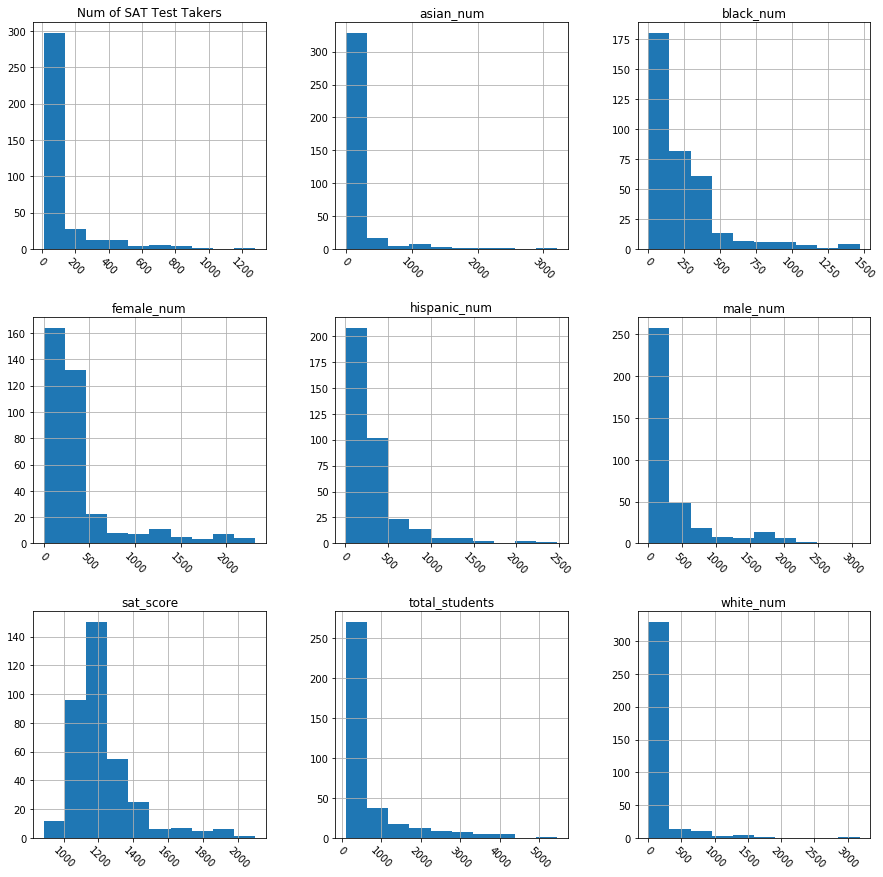

In [87]:
objective1_visual1()

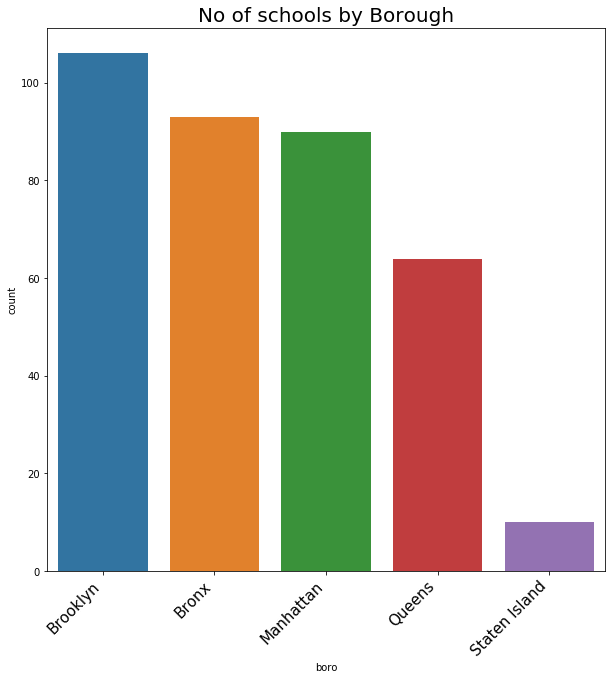

In [88]:
objective1_visual2()

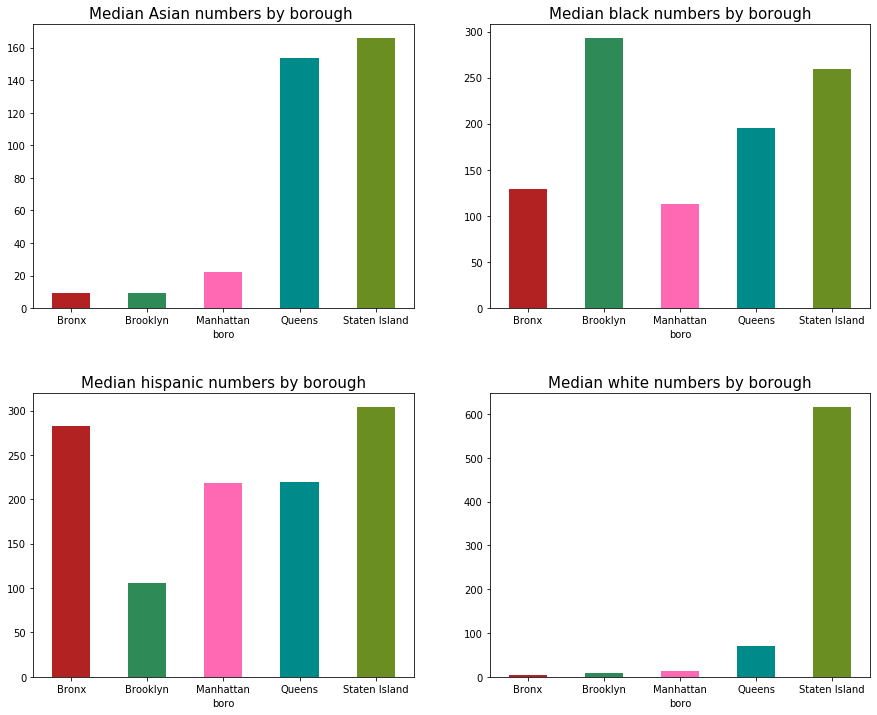

In [89]:
objective1_visual3()

## Objective 2 
### Explanation of Results
- first plot shows correlation between Race and SAT score. A higher percentage of white and Asian students at a school correlates positively with the sat score, whereas a higher percentage of black and Hispanic students correlates negatively with sat score.

- in second plot we can see safety and respect score on neywork map, brooklyn has low score - this is where more blacks and hispanic live the most. this could be also a reason for poor performance in black and hispanic communities. 

- third plot shows correlation between Gender and SAT score. From the output, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score.

- plot four shows correlation between female percentage and SAT score.The data is highly concentrated between 40-60% of females.Schools having between 50-60% females tend to score above 1600

- plot five show scatter plot between AP exams and SAT score.As you can see, there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not a strong correlation.

- plot six show scatter plot between class size and SAT score. it seems there is positive correlation between average class size and sat scores. Schools having large class sizes (30-40) tend to have SAT scores (1400-2100)

### Visualisation

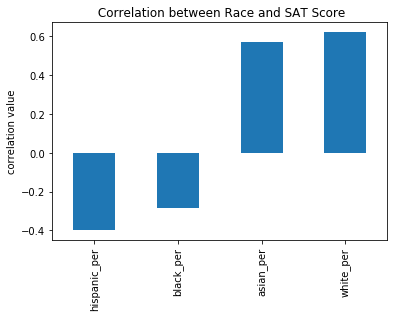

In [90]:
plot_sat_race_corr()

In [91]:
boros = combined.groupby('boro').agg(numpy.mean)["saf_s_11"]
print(boros)

boro
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


Brookyln is the least safe place according to this data while Manhattan followed by Queens are the safest place for students.

C:\Users\PG\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\PG\anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


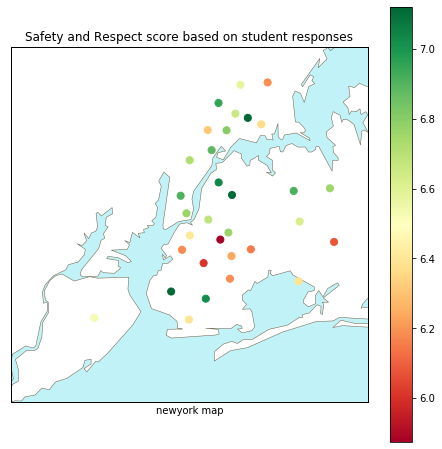

In [57]:
safety_score_by_borough()

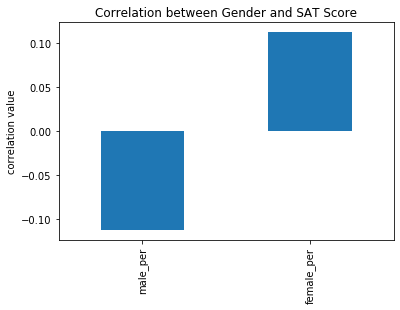

In [92]:
plot_sat_gender_corr()

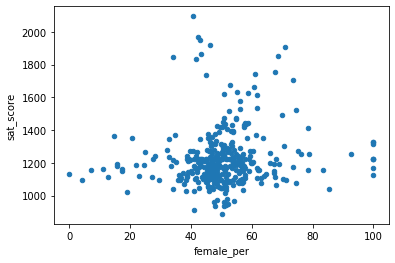

In [93]:
combined.plot(x='female_per',y='sat_score',kind='scatter')
plt.show()

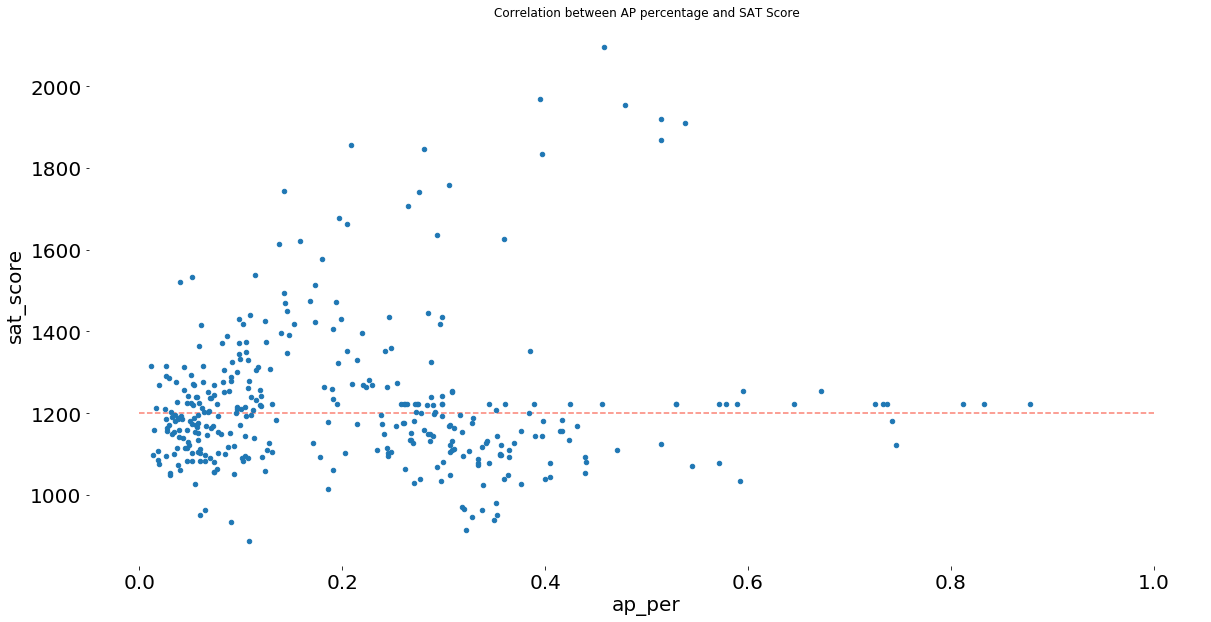

In [94]:
plot_sat_ap_corr()

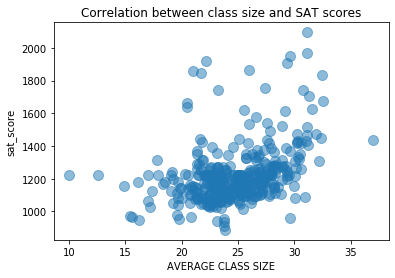

In [95]:
plot_sat_size_corr()

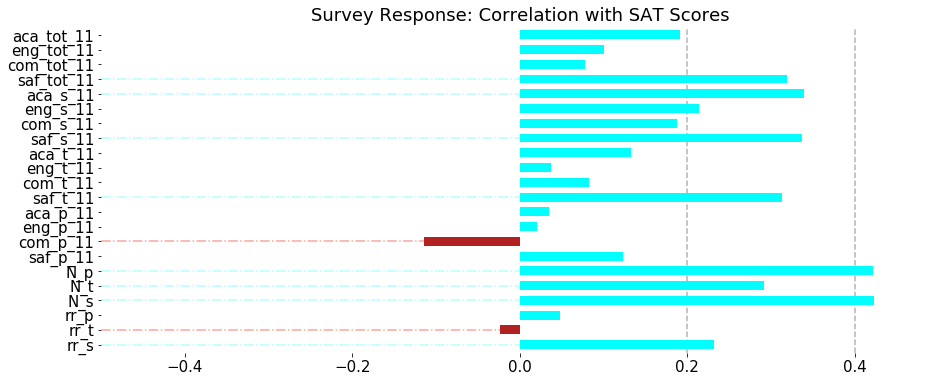

In [106]:
plot_sat_survey_response()

In [116]:
survery_columns_description()

rr_s                                      Student Response Rate
rr_t                                      Teacher Response Rate
N_s                               Number of student respondents
N_t                               Number of teacher respondents
N_p                                Number of parent respondents
com_p_11          Communication score based on parent responses
saf_t_11      Safety and Respect score based on teacher resp...
saf_s_11      Safety and Respect score based on student resp...
aca_s_11      Academic expectations score based on student r...
saf_tot_11                       Safety and Respect total score
dtype: object

- from above plot we can say safety and respect perceptions seem to be important in achieving higher SAT scores
- teacher response rate (rr_t) and communication score based on parent responses (com_p_11) have 
negative correlation and value is small. so these factors aren't correlated with sat_socre at all.

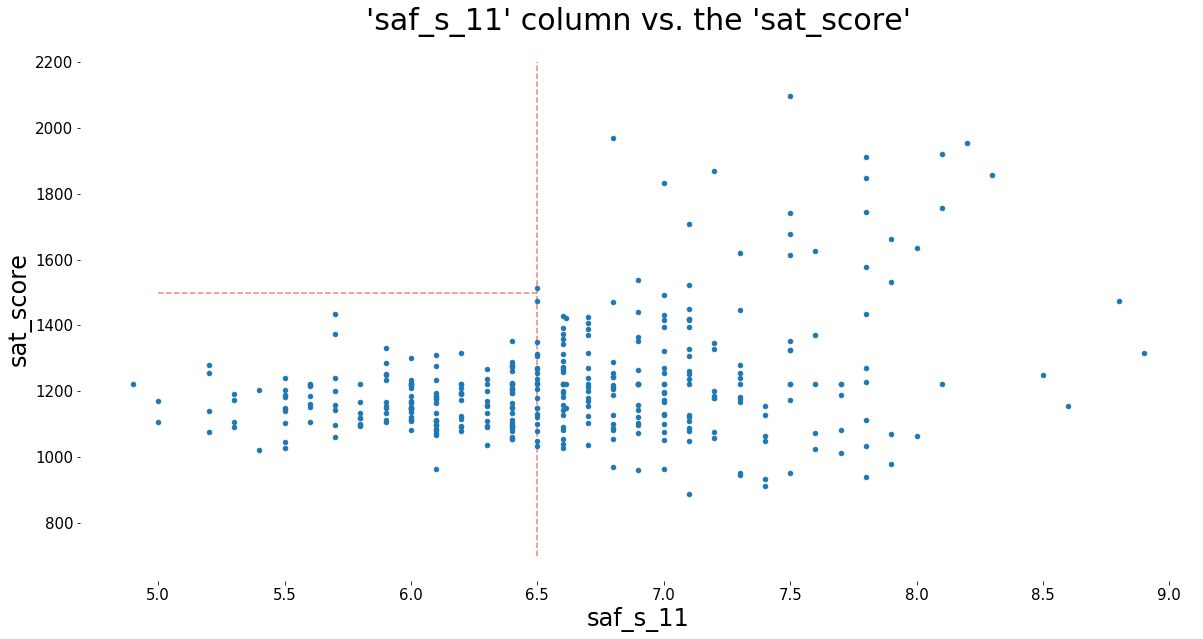

In [102]:
plot_sat_safety_corr()

There is some correlation between SAT scores and safety, although it isn't very strong one. There are a few schools with extremely high SAT scores and high safety scores. There are, also, a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 points(a red line) or so

# Conclusion (5 marks)

We have cleaned different data sets, combined them together, condensed the columns, found correlations and visualized them and then analyzed the data related to SAT scores and demographics details in NYC public high schools in order to find any possible relationship with race, location etc. So in this project we explored relationships between SAT scores and various demographic factors, in order to detect possible unfairness or bias in the SAT scores.


### Acheivements
- SAT scores tend to be higher at schools with high percentages of white and Asian students, and lower at schools with high percentages of Hispanic and black students.Possible reasons for poor performance in hispanic and black community:

 1) lack of funding for schools in certain areas.
 2) more poor sub-boroughs and people who live there

- Those who didn't do well in AP tests tend to do poorly in SAT tests as well.
- It was interesting to observe that schools with greater average class size perform better than school's with lower average class size
- SAT Scores tend to increase with more female percentage.
- safety and respect perceptions seem to be important in achieving higher SAT scores

### Limitations
In our dataset most of the school names have missing values, this will limit us to investigate further like
checking school background informaton and other statastics via wikipedia which give us important information in deciding whehter SAT results fair or not.

### Future Work
In future we want to work on latest data and compare with previous years and find out whether there exists disparity
in demographics and how it changed over the years.

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [ ]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL